### Loading Data

***1. Cellular Data, Bead Data, Spherical Data***

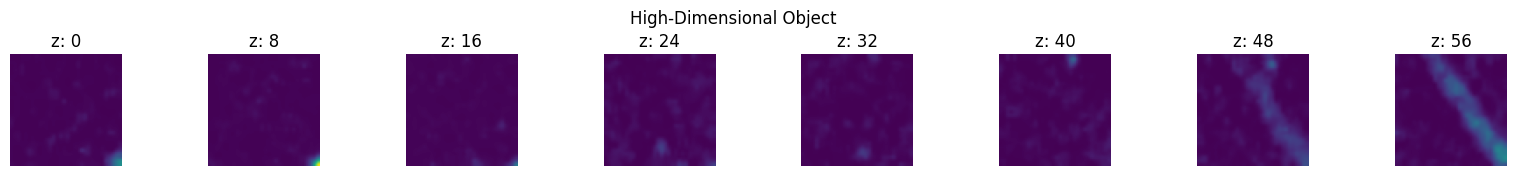

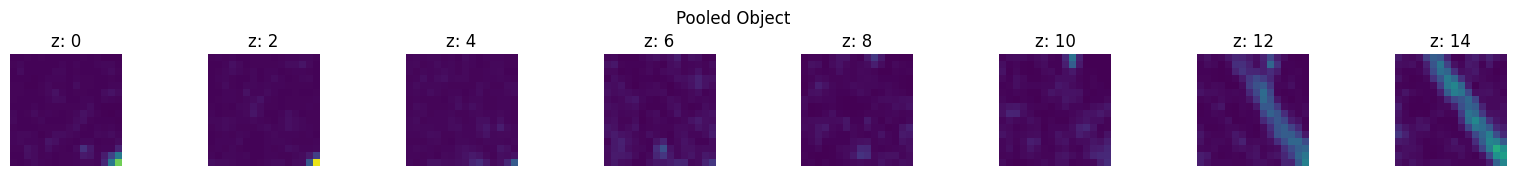

Read Object Parameters
--------------------------
Spatial Dimension	: 64×64×64
Original Dimension	: 32×32×32
Reduced Dimension	: 16×16×16
Raw Data Type		: blood_cell
Device			: cuda



In [1]:
from libs.forward_lib.read_data import ReadData
from libs.forward_lib.visualizer import vis_3d

nx, ny, nz = 64, 64, 64
up_factor = 2

# Initialize the Read Data Model
RD = ReadData(nx, ny, nz, up_factor=up_factor)

# Loading Cellular Data
RD.load_object("blood_cell")

# Visualizing the original Data
RD.visualize_data(is_orginal=True)              # n_planes specify if <8

# Average Pooling Operation To Reduce Dimension
RD.reduce_dimension()

# Visualize the Dimension Reduced Data
RD.visualize_data()                   # n_planes specify if <8
print(RD)

***2. MNIST Based Data*** (10s)

MNIST Simulator
--------------------------------------------
Spatial Dimension		: 64×64×64
Number of Bodies 		: 1
Original Intensity Weight 	: 0.1
Up-sampling Factor		: 2



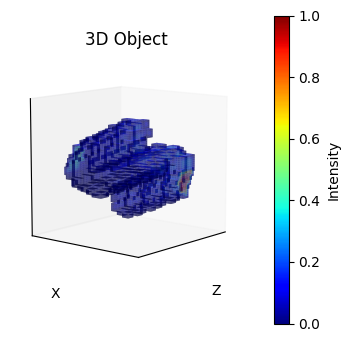

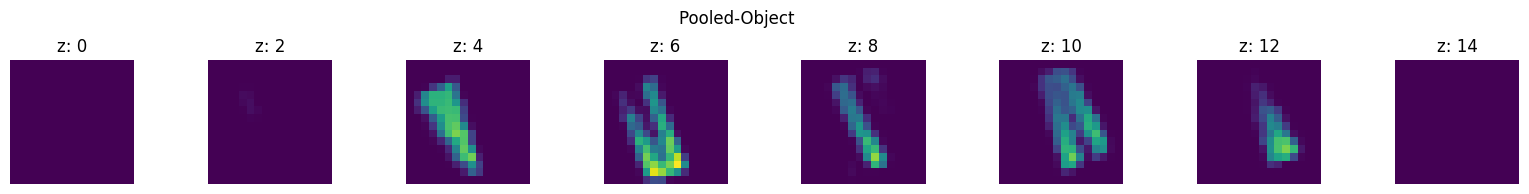

In [4]:
from libs.forward_lib.simulate_data import MnistSimulator

nx, ny, nz = 64,64, 64
MS = MnistSimulator(nx, ny, nz, up_factor=2)
print(MS)

# To Get New Data
MS.update_data()
# MS.visualize_object(azim_ang=20, ele_ang=30)
MS.visualize_object()
# To access the data directly use MS.X
MS.reduce_dimension()
MS.visualize_object(vis_planes=True, is_original=False)

***2. Sythetic bead data***

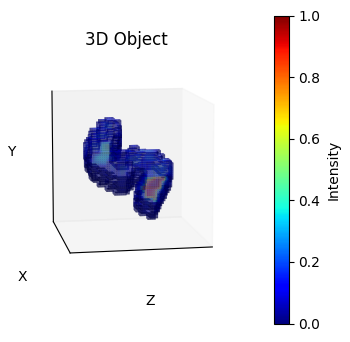

In [6]:
MS.visualize_object(azim_ang=80)

Synthetic bead Simulator
--------------------------------------------
Spatial Dimension		: 60×60×60
Number of spheres 		: 3
Number of ellipsoids 		: 2



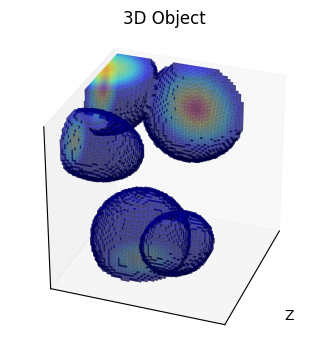

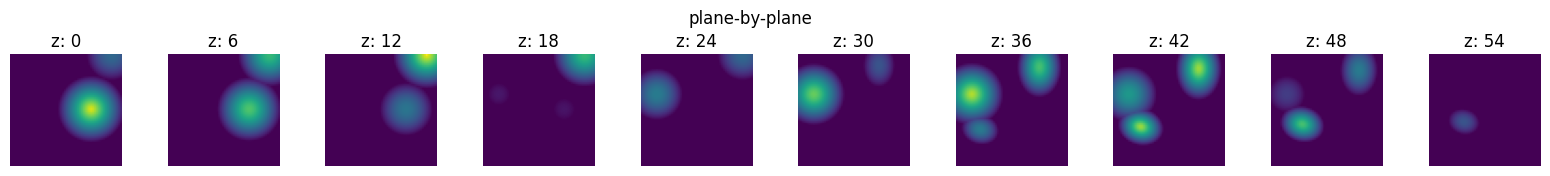

In [4]:
from libs.forward_lib.simulate_data import SyntheticBeadSimulator
SBS = SyntheticBeadSimulator(nx, ny, nz)
print(SBS)

# To Get New Data
# SBS.generate_volume()
SBS.visualize_object3D(azim_ang=20, ele_ang=30)
SBS.visualize_object2D(n_planes=10)


### Microscopic Model

Forward Model Specifications
----------------------------------------------
Space Dimension 		: 5.12um × 5.12um × 5.12um
voxel Size 			: 0.08um × 0.08um × 0.08um
DMD Patterns 			: 2
Measurement Plane		: [32]
Detector Pool size 		: 1×1
Computational Device 		: cuda


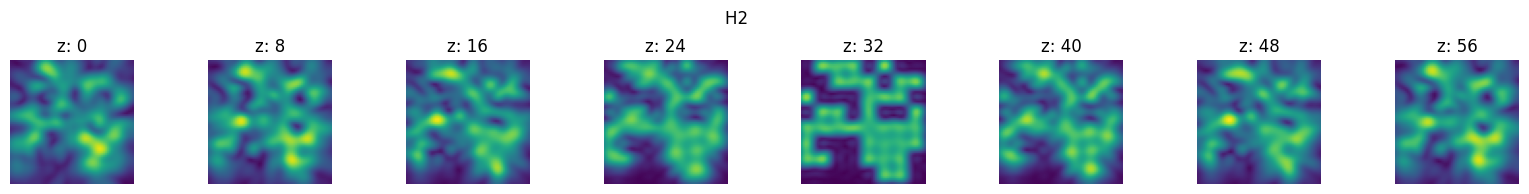

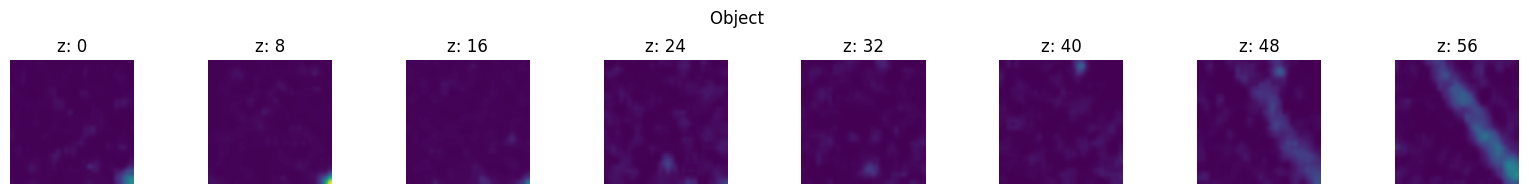

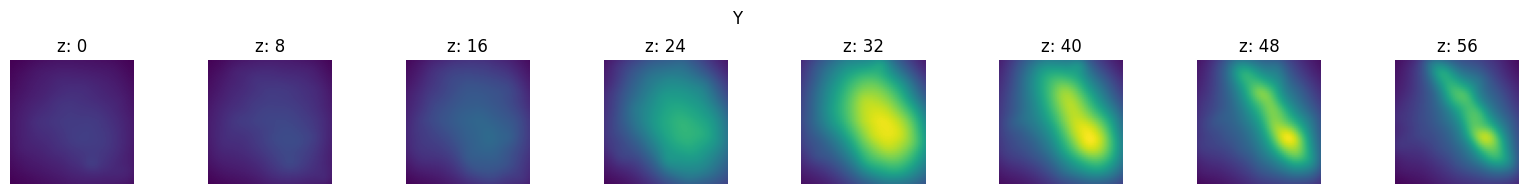

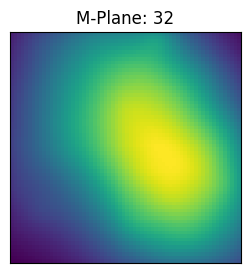

In [2]:
from libs.forward_lib.physical_model import PhysicalModel

nx, ny, nz = 64, 64, 64
m = 2
dd_factor = 1
# Initialize the Physical Model
PM = PhysicalModel(nx, ny, nz, m, dd_factor=dd_factor)
PM.init_psf()
PM.dmd.initialize_patterns()
# Better Understand the Physical Model
print(PM)

measurements = PM.propagate_object(RD.X, verbose=3)             # verbose: [0, 1, 2, 3]

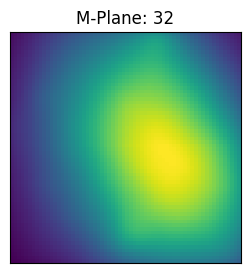

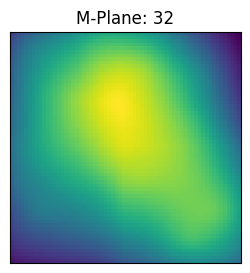

In [3]:
# Change the Initialization of DMD Patterns
PM.dmd.initialize_patterns()

# Measurements from multiple DMD patterns
measurements = PM.extended_propagation(RD.X, verbose=True)

### Field

Field Space Specifications
----------------------------------------------
NA				: 0.8
Space Dimension 		: 10.24um × 10.24um × 10.24um
voxel Size 			: 0.08um × 0.08um × 0.08um
Pattern Dimension 		: 0.64um × 0.64um 
Computational Device 		: cuda


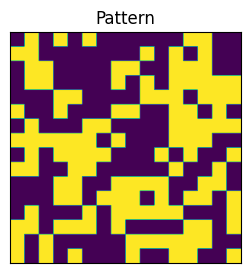

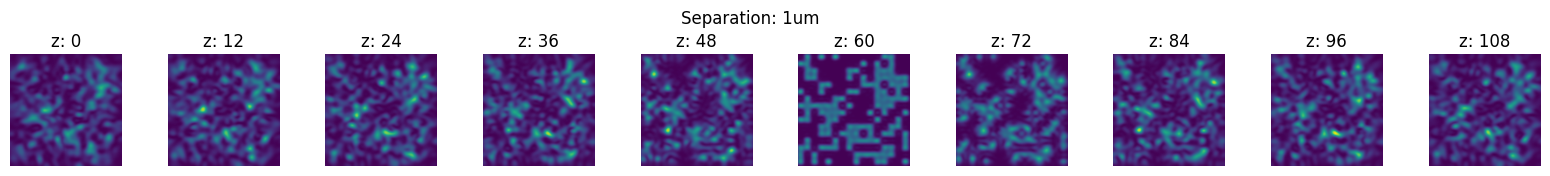

In [3]:
from libs.forward_lib.field_model import FieldModel

# Parameter Initialization
nx, ny, nz = 128, 128, 128
FM = FieldModel(nx, ny, nz)

# Model Parameters
print(FM)

# PSF Calculation & Field Propagation
FM.propagate_field()

# Visualizing DMD pattern
FM.PM.dmd.visualize_patterns()


# Visualize at Field at Certain Seperation
FM.visualize_at_separation(separation=1)

# Saving the Field Space Matrix
FM.save_object_space(it = 102)


***Loading Workflow***

Field Space Specifications
----------------------------------------------
NA				: 0.8
Space Dimension 		: 10.24um × 10.24um × 10.24um
voxel Size 			: 0.08um × 0.08um × 0.08um
Pattern Dimension 		: 0.64um × 0.64um 
Computational Device 		: cuda


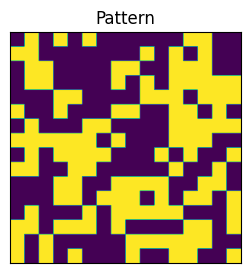

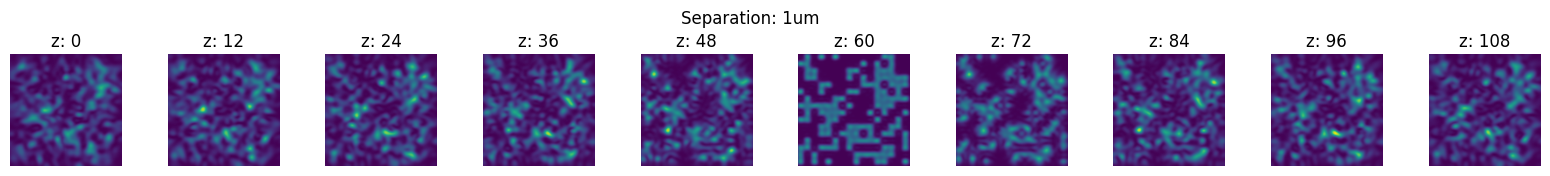

In [4]:
from libs.forward_lib.field_model import FieldModel

IT = 102
# Model Initialization
FM = FieldModel()
FM.load_object_space(IT)

# Model Parameters
print(FM)

# Visualizing DMD pattern
FM.PM.dmd.visualize_patterns()

# Visualize at Feild at Certain Seperation
FM.visualize_at_separation(separation=1)



***Clear Analysis***

Field Space Specifications
----------------------------------------------
NA				: 0.8
Space Dimension 		: 10.24um × 10.24um × 10.24um
voxel Size 			: 0.08um × 0.08um × 0.08um
Pattern Dimension 		: 0.64um × 0.64um 
Computational Device 		: cuda


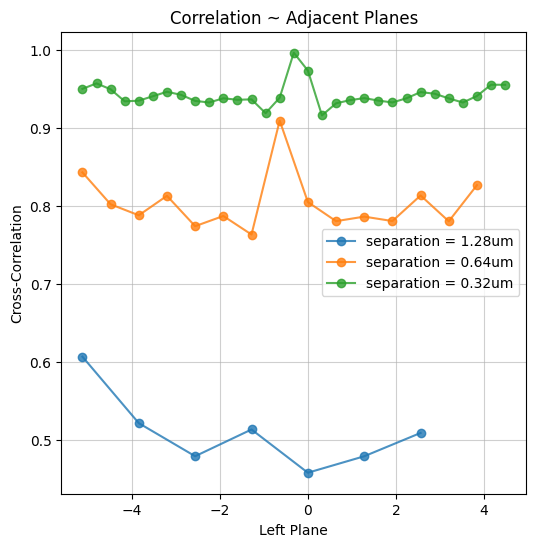

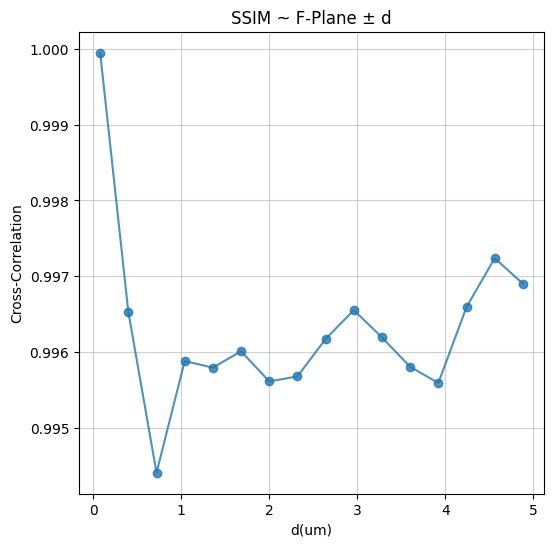

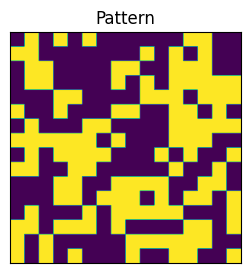

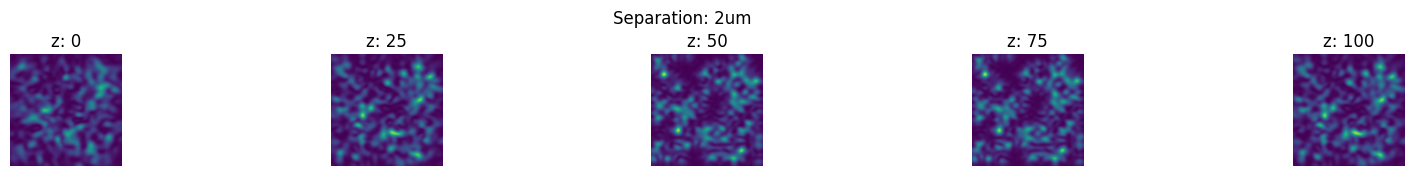

In [2]:
from libs.forward_lib.field_model import FieldModel

it = 102
FM = FieldModel()
FM.load_object_space(it = it)
print(FM)
FM.correlation_measure([1.28,.64,.32])
FM.symmetric_check(4)
FM.PM.dmd.visualize_patterns()
FM.visualize_at_separation(2)